## Self-Driving Car Engineer Nanodegree

In this project we are going to recognize lane lines more accurately using Conputer Vision.

## Import Packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
from queue import *
import os
from PIL import Image as IMG
from IPython.display import Image
from IPython.display import display
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import glob
from moviepy.editor import *
from IPython.display import HTML
import warnings
%matplotlib inline

## Read in an Image

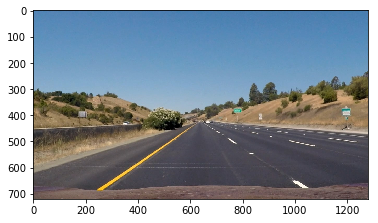

In [2]:
image = mpimg.imread('test_images/straight_lines1.jpg')
plt.imshow(image)

q_y = Queue(maxsize=15) # Queue for storing the y co-ordinate
q_xl = Queue(maxsize=15) # Queue for storing the x co-ordinate of left line
q_xr = Queue(maxsize=15) # Queue for storing the x co-ordinate of right line

img_shape0 = image.shape[0]
img_shape1 = image.shape[1]

## Calibrating the Camera And Correcting for Distortion

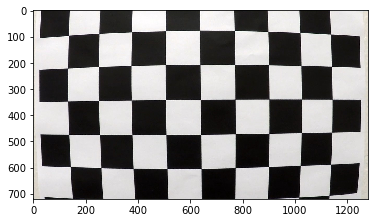

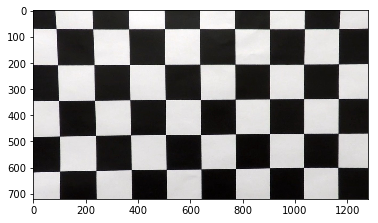

In [3]:
# importing all the images for calibration
images = glob.glob('./camera_cal/calibration*.jpg')

objpoints = [] # Coordinates for points in real world
imgpoints = [] # Coordinates for points in image space

objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

for fname in images:
    img = mpimg.imread(fname)
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    ret,corners = cv2.findChessboardCorners(gray_img, (9,6), None)

    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)

        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray_img.shape[::-1], None, None)
undist_img = cv2.undistort(mpimg.imread('./camera_cal/calibration1.jpg'),mtx, dist, None, mtx)

fig = plt.figure()
plt.imshow(mpimg.imread('./camera_cal/calibration1.jpg'))
fig.savefig('./output_images/Distorted.jpg', bbox_inches='tight')
fig = plt.figure()
plt.imshow(undist_img)
fig.savefig('./output_images/Undistorted.jpg', bbox_inches='tight')

In [4]:
# Function for caliberating Images
def caliberate_img(in_img):
    #Undistorting the image
    undist_img = cv2.undistort(in_img, mtx, dist, None, mtx)
    return undist_img

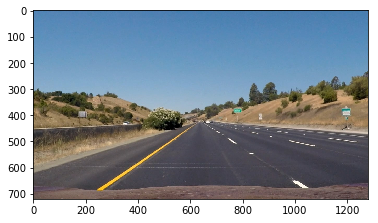

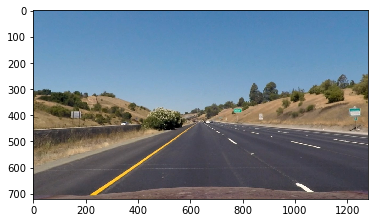

In [5]:
img = mpimg.imread('./test_images/straight_lines1.jpg')
fig = plt.figure()
plt.imshow(img)
fig.savefig('./output_images/Straight_lines_1.jpg', bbox_inches='tight')

img = mpimg.imread('./test_images/straight_lines1.jpg')
undist_img = cv2.undistort(img, mtx, dist, None, mtx)
fig = plt.figure()
plt.imshow(undist_img)
fig.savefig('./output_images/Undistorted_Straight_lines_1.jpg', bbox_inches='tight')

## Pre-Processing the Image

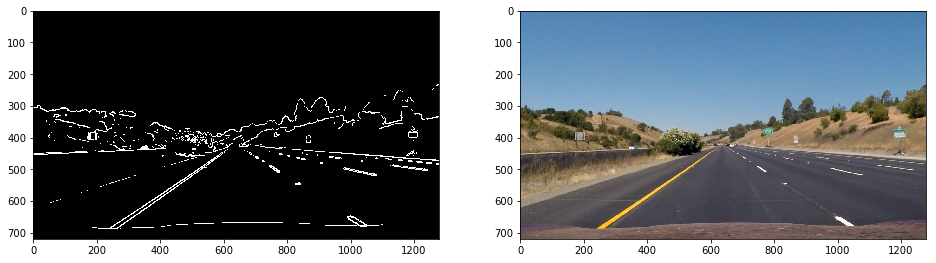

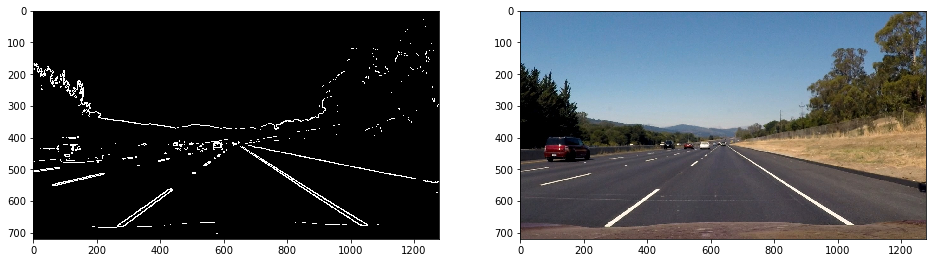

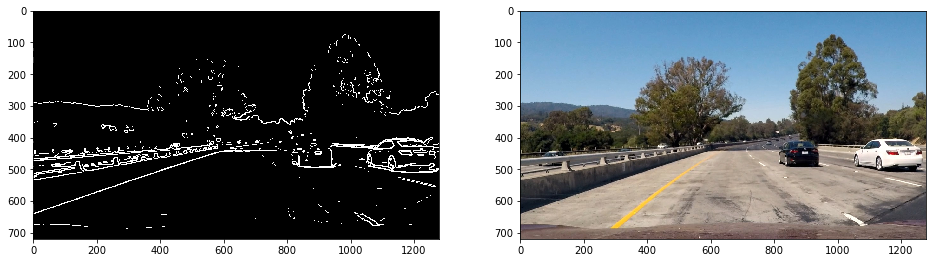

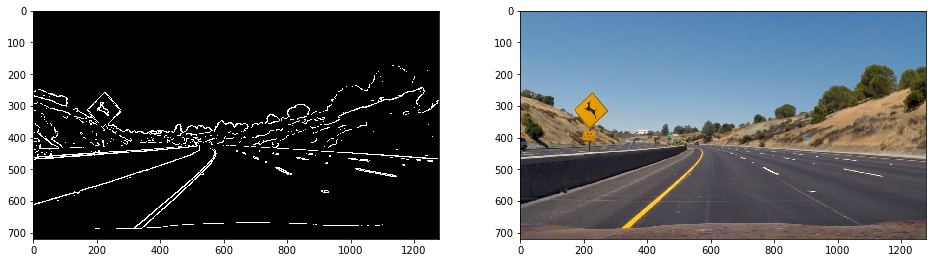

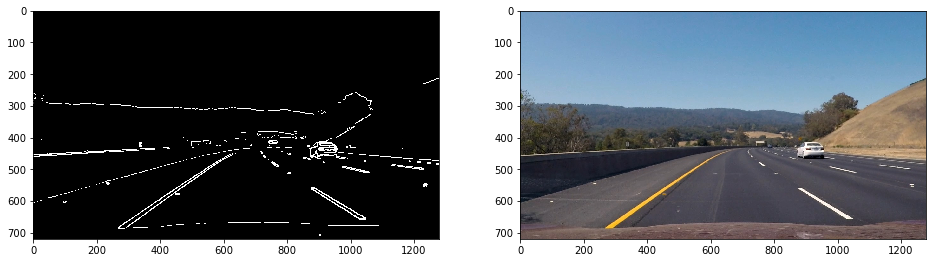

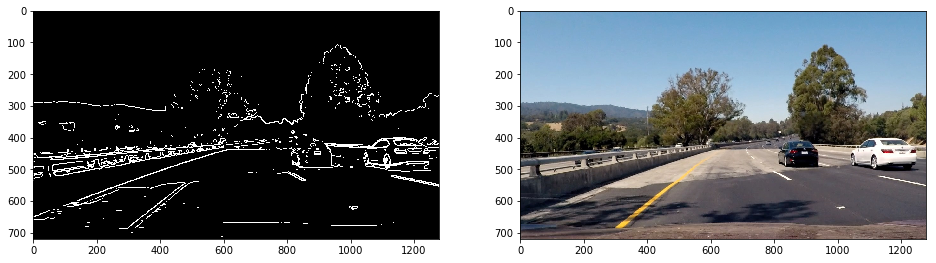

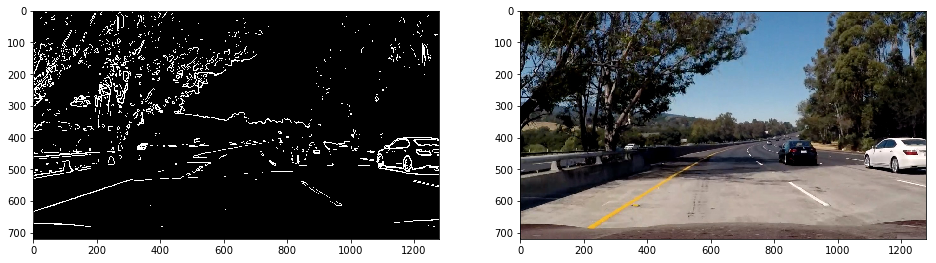

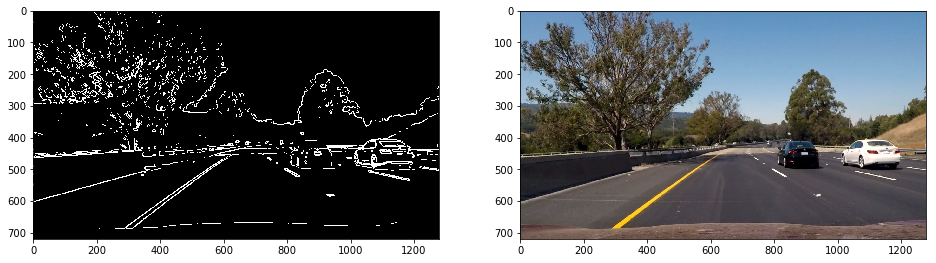

In [6]:
# File paths for all the straight line images
straight_line_images = glob.glob('./test_images/straight_lines*.jpg')
# File paths for all the test images
test_images = glob.glob('./test_images/test*.jpg')

# Concatenating the file paths
concat_test_images = np.concatenate((straight_line_images, test_images))

# This function is only to Test different types of pre-processing methods
def masking_img(img):
    img = cv2.bilateralFilter(img,9,80,80)
    img = cv2.GaussianBlur(img,(5,5),0)
    
    # Grayscaling the image and the applying the sobel operator
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1)
    sobel_mag = np.sqrt(np.square(sobelx) + np.square(sobely))
    scaled_sobel = np.uint8(255*sobel_mag/np.max(sobel_mag))
    
    # Threshold x gradient
    thresh_min = 50
    thresh_max = 250
    sbinary = np.zeros_like(scaled_sobel)
    sbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    return sbinary
    
# Testing on all the images
for img_path in concat_test_images:
    img = mpimg.imread(img_path)
    
    mask_img = masking_img(img)
    
    plt.figure(figsize=(16,9))
    plt.subplot(121)
    plt.imshow(mask_img, cmap ='gray')
    
    plt.subplot(122)
    plt.imshow(img)

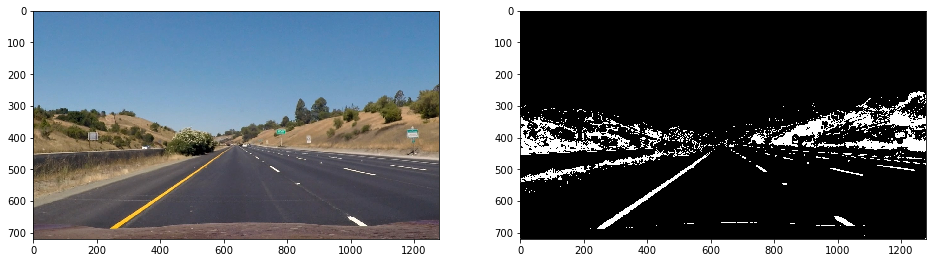

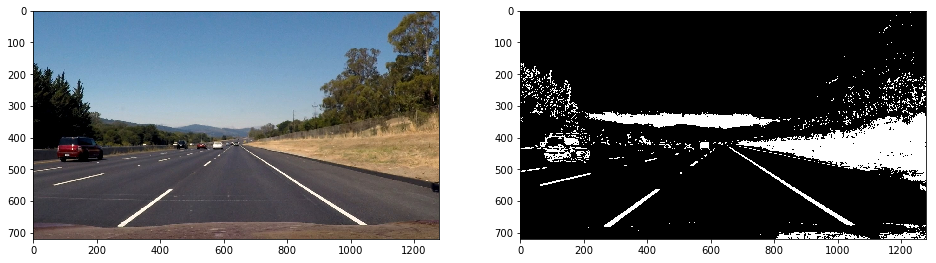

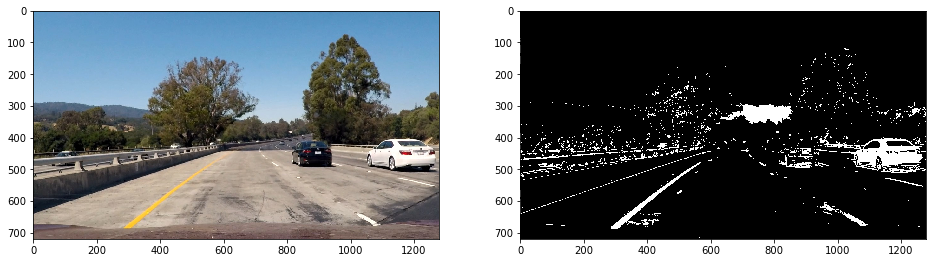

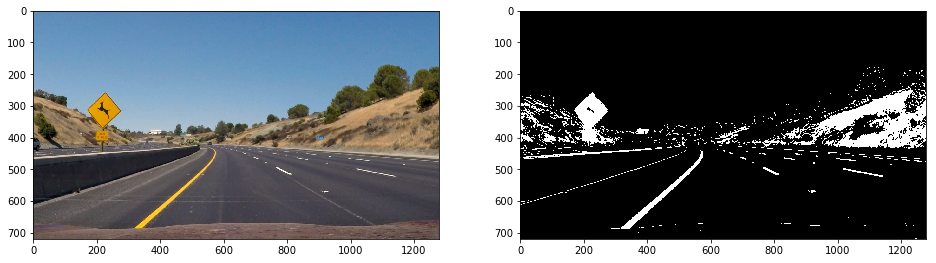

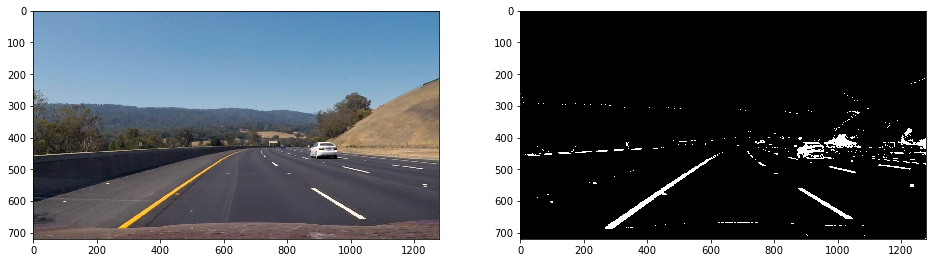

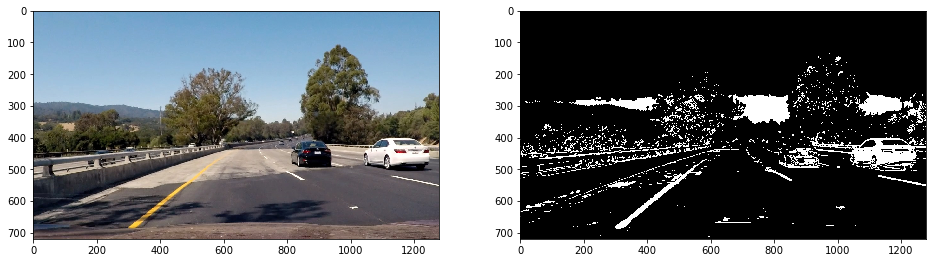

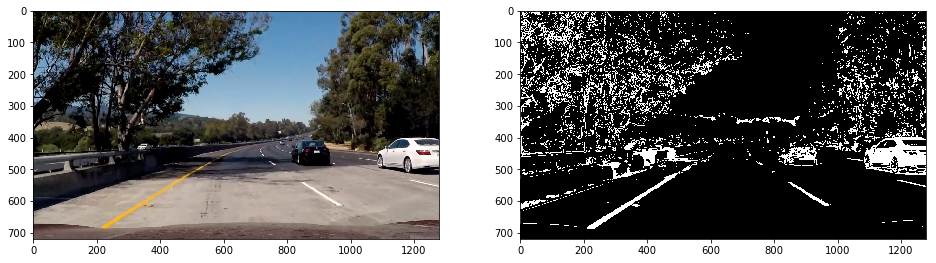

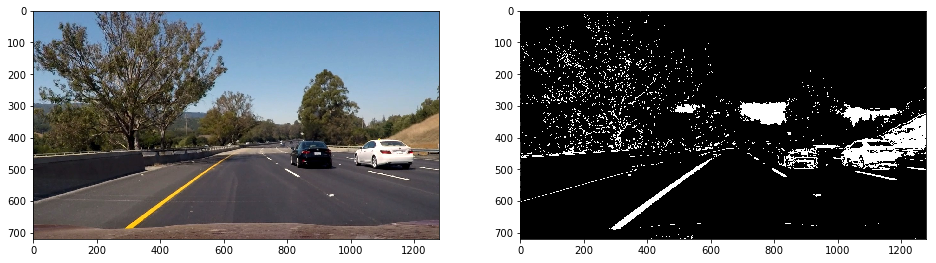

In [7]:
# Function to pre-process the image
def preprocess_image(img):
    
    #img = cv2.GaussianBlur(img,(5,5),0)
    #img = cv2.bilateralFilter(img,9,80,80)
    
    # CLAHE transform
    #clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    #image = img.astype(np.uint8)
    #lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    #l, a, b = cv2.split(lab)
    #transform = clahe.apply(l)
    #temp = cv2.merge((transform,a,b))
    #img = cv2.cvtColor(temp, cv2.COLOR_LAB2RGB)
    
    # Histogram Equilization 
    #image = img.astype(np.uint8)
    #yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    #y, u, v = cv2.split(yuv)
    #transform = cv2.equalizeHist(y)
    #temp = cv2.merge((transform, u, v))
    #img = cv2.cvtColor(temp, cv2.COLOR_YUV2RGB)
    
    #plt.imshow(img)
    
    # Choosing only the S-Channel in HLS
    hls_img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls_img[:,:,2]
    
    # Choosing only the R-Channel in RGB
    r_channel = img[:,:,0]
    
    # Grayscaling the image and the applying the sobel operator
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1)
    sobel_mag = np.sqrt(np.square(sobelx) + np.square(sobely))
    scaled_sobel = np.uint8(255*sobel_mag/np.max(sobel_mag))
    
    # Threshold x gradient
    thresh_min = 80
    thresh_max = 255
    sbinary = np.zeros_like(scaled_sobel)
    sbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    # Threshold color channel (S - Channel)
    s_thresh_min = 170
    s_thresh_max = 255
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1

    # Threshold color channel (R - Channel) [Not-Used]
    r_thresh_min = 220
    r_thresh_max = 255
    r_channel = img[:,:,0]
    r_binary = np.zeros_like(r_channel)
    r_binary[(r_channel >= r_thresh_min) & (r_channel <= r_thresh_max)] = 1
    
    hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    yellow_low_array  = np.array([ 0,  100,  100])
    yellow_high_array = np.array([ 80, 255, 255])
    white_low_array  = np.array([ 180, 180, 180])
    white_high_array = np.array([ 255, 255, 255])
    white_mask = (cv2.inRange(img, white_low_array, white_high_array)/255).astype(int)
    yellow_mask = (cv2.inRange(hsv_img, yellow_low_array, yellow_high_array)/255).astype(int)
    
    # Combining S-Channel pre-processing with Sobel Pre-processing
    combined_binary = np.zeros_like(sbinary)
    combined_binary[(white_mask == 1) | (yellow_mask == 1) | (sbinary == 1) | (s_binary == 1)] = 1
    #for i in combined_binary.shape[0]:
    #    for j in combined_binary.shape[1]:
    #        combined_binary[i][j] = 
    #combined_binary = r_binary
    
    return combined_binary

# Testing the pre-processing on test images
for index,img_path in enumerate(concat_test_images):
    
    img = mpimg.imread(img_path)
    
    result_image = preprocess_image(img)
    
    fig = plt.figure(figsize=(16,9))
    plt.subplot(121)
    plt.imshow(img)
    
    plt.subplot(122)
    plt.imshow(result_image, cmap='gray')
    fig.savefig('./output_images/Binary_Image_' + str(index) + '.jpg', bbox_inches='tight')

## Transforming the perspective of the image

Transformaing the perspective of the image by mapping a perspective rectangle from the image to a equivalent rectangle in transformed image.

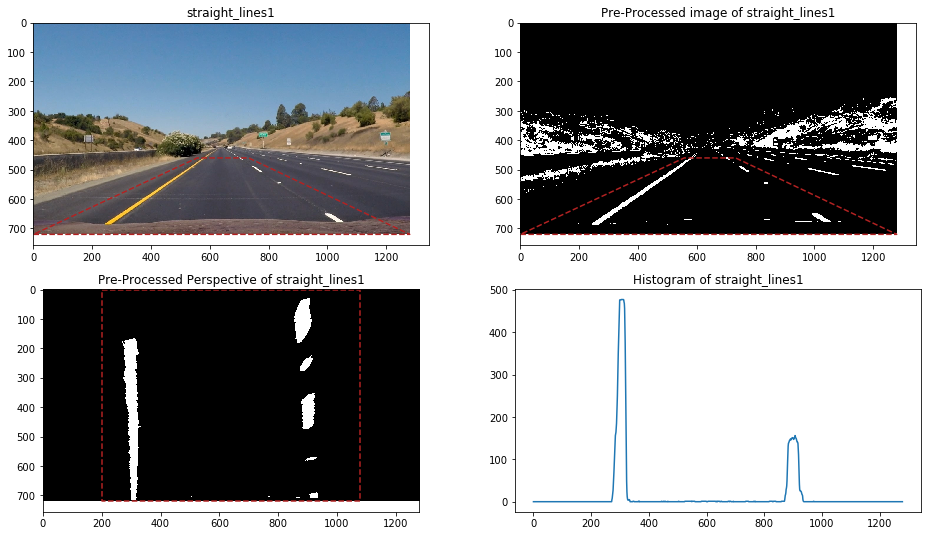

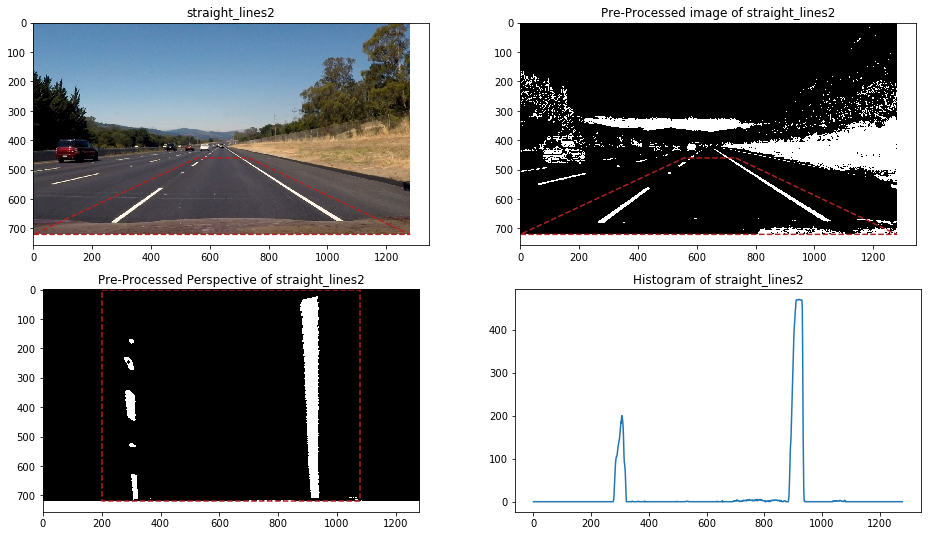

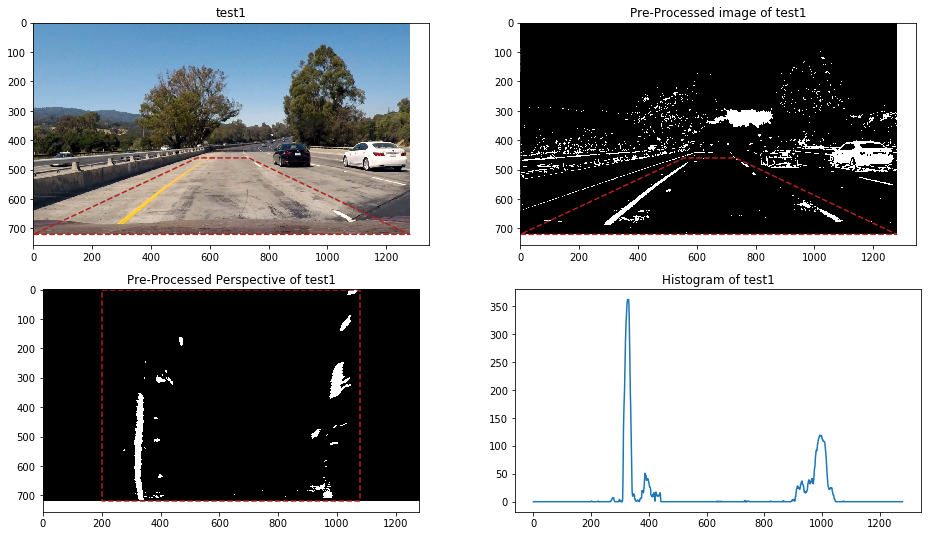

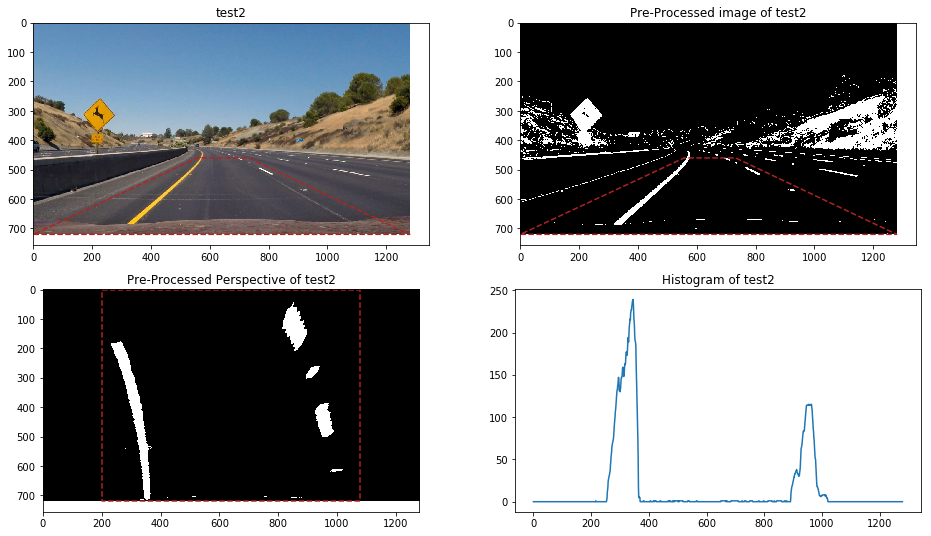

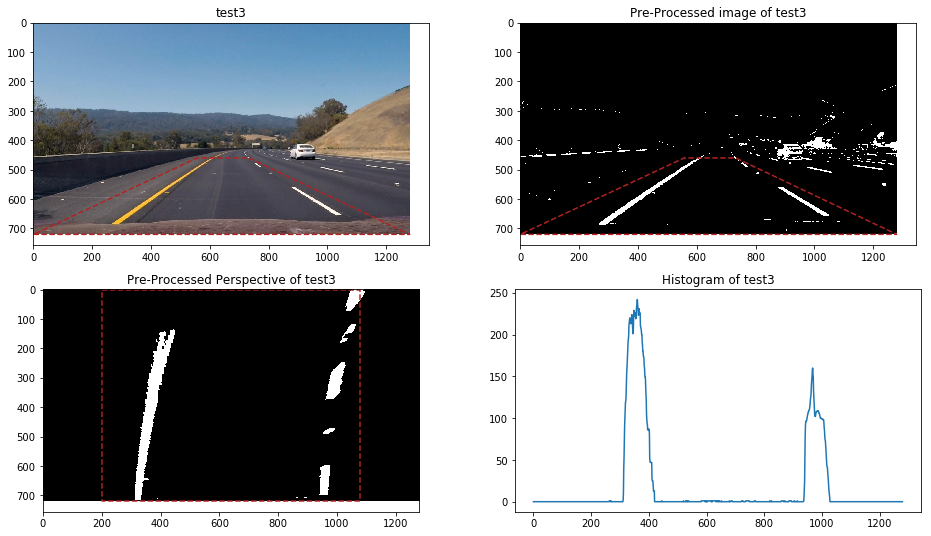

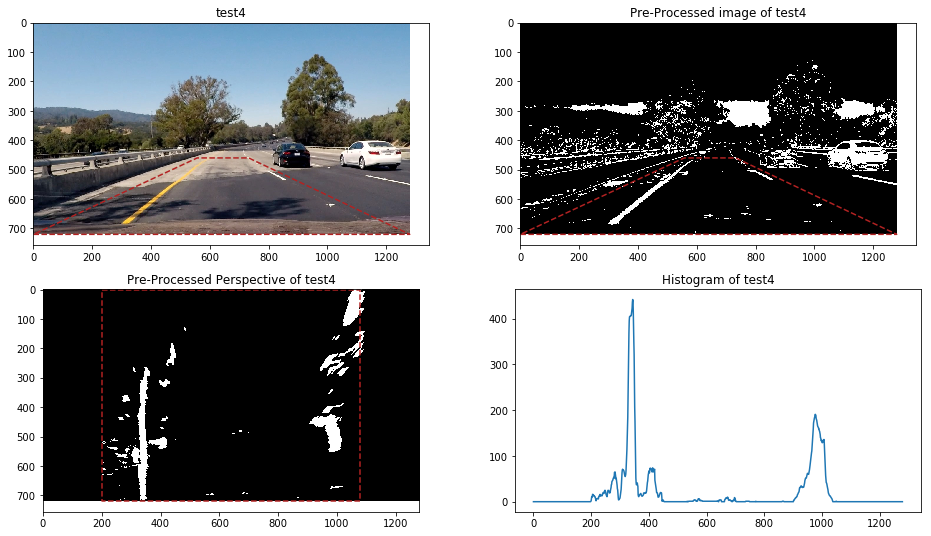

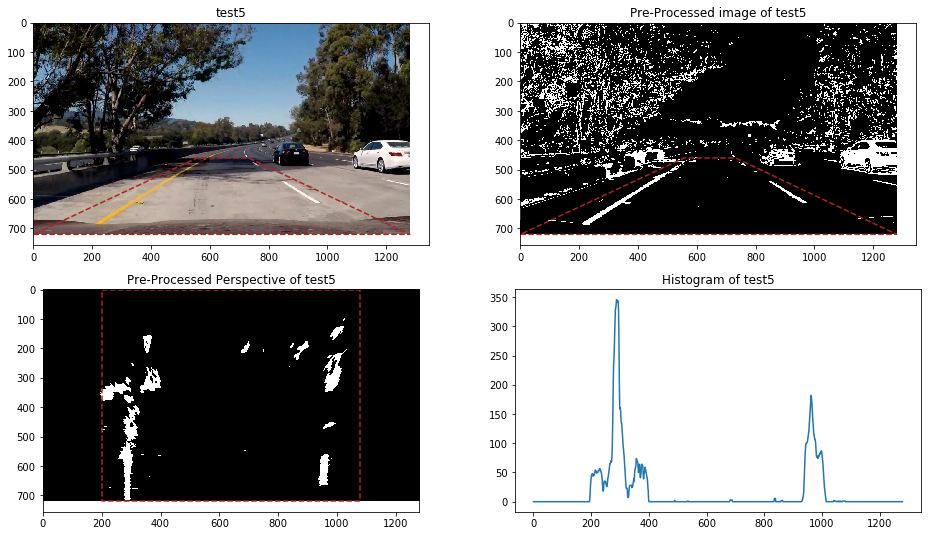

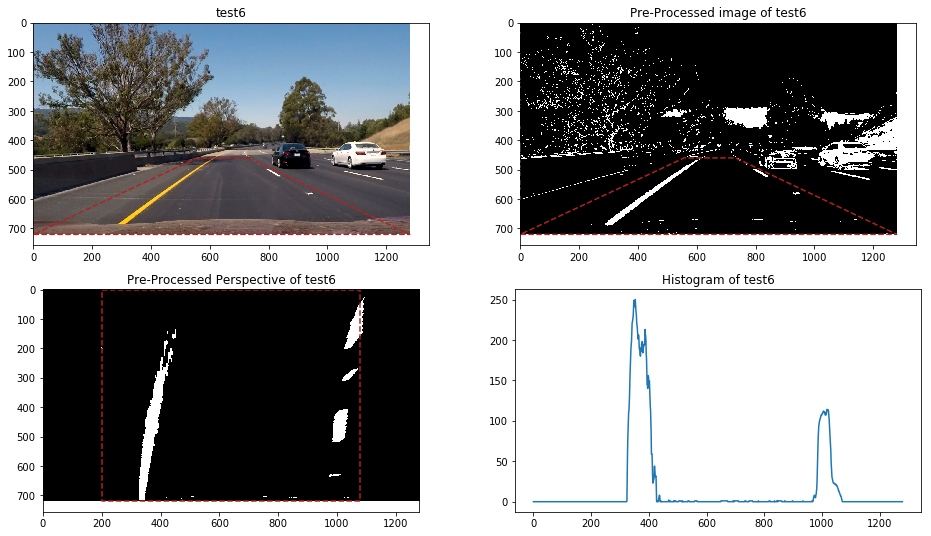

In [8]:
# transforming the perspective of the image
def transform_img(img):
    # Reading the image for example
    #img = mpimg.imread('./test_images/test2.jpg')
    img = cv2.undistort(img,mtx, dist, None, mtx)
    """
    left_bottom_original = [150, 720]
    right_bottom_original = [1280, 720]
    left_top_original = [570, 460]
    right_top_original = [732, 460]
    """
    # Co-ordinates of the rectangle from the original image
    left_bottom_original = [0, 720]
    right_bottom_original = [1280, 720]
    left_top_original = [557, 460]
    right_top_original = [732, 460]

    # Drawing lines between the co-ordinates
    left_original = np.polyfit((left_bottom_original[0], left_top_original[0]), (left_bottom_original[1], left_top_original[1]), 1)
    right_original = np.polyfit((right_bottom_original[0], right_top_original[0]), (right_bottom_original[1], right_top_original[1]), 1)
    bottom_original = np.polyfit((left_bottom_original[0], right_bottom_original[0]), (left_bottom_original[1], right_bottom_original[1]), 1)
    top_original = np.polyfit((left_top_original[0], right_top_original[0]), (left_top_original[1], right_top_original[1]), 1)

    # Vertices for the rectangle
    vertices = np.array([[(left_bottom_original[0], left_bottom_original[1]),(left_top_original[0], left_top_original[1]),
                          (right_top_original[0], right_top_original[1]),(right_bottom_original[0], right_bottom_original[1])]]
                            , dtype=np.int32)

    #defining a blank mask to start with
    mask = np.zeros_like(img)   

    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255

    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)

    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)

    x_before = [left_bottom_original[0], right_bottom_original[0], right_top_original[0], left_top_original[0], left_bottom_original[0]]
    y_before = [left_bottom_original[1], right_bottom_original[1], right_top_original[1], left_top_original[1], left_bottom_original[1]]

    imshape = img.shape

    # Source coordinates for the image
    src = np.float32([[left_top_original[0], left_top_original[1]],
                     [right_top_original[0], right_top_original[1]],
                     [right_bottom_original[0], right_bottom_original[1]],
                     [left_bottom_original[0], left_bottom_original[1]]])

    left_top_warped = [200,0]
    right_top_warped = [1080,0]
    right_bottom_warped = [1080,720]
    left_bottom_warped = [200,720]

    # Destination coordinates for the image
    dst = np.float32([
         [left_top_warped[0], left_top_warped[0]],
         [right_top_warped[0], right_top_warped[1]],
         [right_bottom_warped[0], right_bottom_warped[1]],
         [left_bottom_warped[0], left_bottom_warped[1]]])

    x_warped = [left_top_warped[0], right_top_warped[0], right_bottom_warped[0], left_bottom_warped[0], left_top_warped[0]]

    y_warped = [left_top_warped[1], right_top_warped[1], right_bottom_warped[1], left_bottom_warped[1], left_top_warped[1]]

    M = cv2.getPerspectiveTransform(src, dst)

    Minv = cv2.getPerspectiveTransform(dst, src)
    
    warped = cv2.warpPerspective(masked_image, M, (imshape[1], imshape[0]), flags=cv2.INTER_LINEAR)
    
    return warped, x_before, y_before, x_warped, y_warped, Minv



for index, img_path in enumerate(concat_test_images):
    
    img = mpimg.imread(img_path)
        
    image_name = img_path.split('\\')[1].split('.')[0]
    processed_img = preprocess_image(img)
    result_image, x_before, y_before, x_warped, y_warped,_ = transform_img(processed_img)
    
    fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, figsize=(16,9))
    
    ax1.set_title(image_name)
    ax1.imshow(img)
    ax1.plot(x_before, y_before, '--',color='firebrick')
    
    ax2.set_title('Pre-Processed image of ' + image_name)
    ax2.imshow(processed_img, cmap = 'gray')
    ax2.plot(x_before, y_before, '--', color='firebrick')
    
    
    ax3.set_title('Pre-Processed Perspective of ' + image_name)
    ax3.imshow(result_image, cmap='gray')
    ax3.plot(x_warped, y_warped, '--', color='firebrick')
    
    ax4.set_title('Histogram of ' + image_name)
    histogram = np.sum(result_image[result_image.shape[0]//3:,:], axis=0)
    ax4.plot(histogram)
    fig.savefig('./output_images/Perspective_Image_' + str(index) + '.jpg', bbox_inches='tight')

## Sliding Window Search.
Implementing the Sliding Window Search to find the lines.

In [9]:
def sliding_window(processed_img):
    histogram = np.sum(processed_img[processed_img.shape[0]//3:,:], axis=0)
    out_img = np.dstack((processed_img, processed_img, processed_img))*255

    # Starting points for left and right lanes
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # No. of Windows
    nwindows = 9

    # Height of Windows
    window_height = np.int(processed_img.shape[0]/nwindows)

    # Identify all the non zero pixels
    nonzero = processed_img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])

    # Current positions for the pixels
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Width of the window
    margin = 100

    # Minimum number of pixels found to recenter the window
    minpix = 50

    # Lists to recieve left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Image shape = (720, 1280)

    for window in range(nwindows):
        win_y_low = processed_img.shape[0] - (window+1)*window_height
        win_y_high = processed_img.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin

        # Visuvalize the image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0),2)
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0),2)

        # Identify the non-zero pixels within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]

        # Appending the indices to the list
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)

        # Recenter tje Window if number of pixels is greater than minpix
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds]
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    return left_fit, right_fit, left_lane_inds, right_lane_inds, nonzerox, nonzeroy, out_img

## Visuvalizing Sliding Window Search

In [10]:
def averaging_frames(y_cords, left_polyx, right_polyx): # Smoothing the lines over 20 frames.
    global total_y_cords, total_left_polyx, total_right_polyx
    
    total_y_cords = np.zeros(img.shape[0])
    total_left_polyx = np.zeros(img.shape[0])
    total_right_polyx = np.zeros(img.shape[0])
    
    if q_y.full() == True: # If the queue is full then remove the last frame to introduce a new frame.
        # Disposing the variables using temp_1, temp_2, temp_3
        temp_1 = q_y.get()
        temp_2 = q_xl.get()
        temp_3 = q_xr.get()
    # Add a new Frame.
    q_y.put(y_cords)
    q_xl.put(left_polyx)
    q_xr.put(right_polyx)
    
    # Adding up the elements on the queue
    for x in (list(q_y.queue)):
        total_y_cords = tuple(map(sum, zip(total_y_cords, x)))
        
    for y in (list(q_xl.queue)):
        total_left_polyx = tuple(map(sum, zip(total_left_polyx, y)))
        
    for z in (list(q_xr.queue)):
        total_right_polyx = tuple(map(sum, zip(total_right_polyx, z)))
    
    # Averaging the elements
    avg_y = np.array(tuple(x/q_y.qsize() for x in total_y_cords)) # Average of all the y co-ordinates in the queue
    avg_xl = np.array(tuple(x/q_xl.qsize() for x in total_left_polyx)) # Averaging all the left x co-ordinates in the queue
    avg_xr = np.array(tuple(x/q_xr.qsize() for x in total_right_polyx)) # Averaging all the right x co-ordinates in the queue
    
    return avg_y, avg_xl, avg_xr

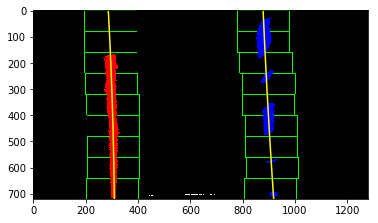

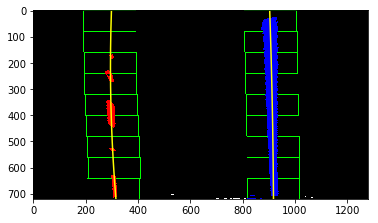

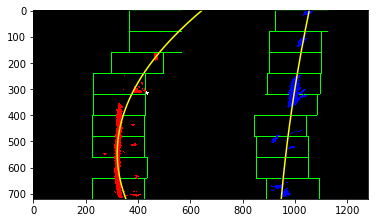

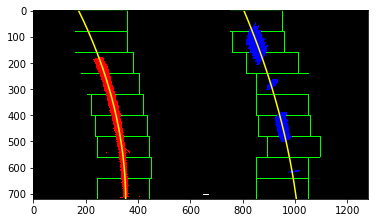

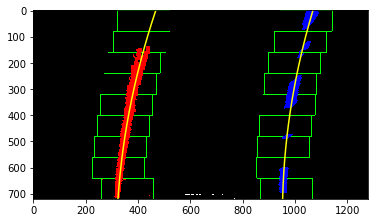

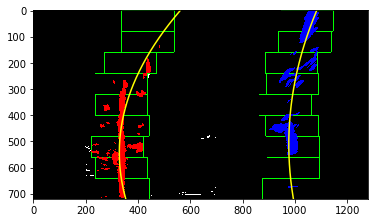

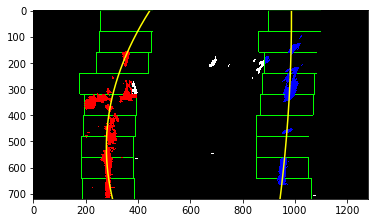

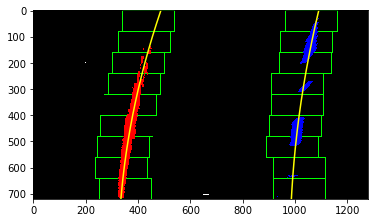

In [11]:
# Demoing the previous function
for index,img_path in enumerate(concat_test_images):
    
    img = mpimg.imread(img_path)
        
    image_name = img_path.split('\\')[1].split('.')[0]
    processed_img = preprocess_image(img)
    result_image, _, _, _, _, Minv = transform_img(processed_img)
    left_fit, right_fit, left_lane_inds, right_lane_inds, nonzerox, nonzeroy, out_img = sliding_window(result_image)
    
    ploty = np.linspace(0, img.shape[0]-1, img.shape[0])
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    fig = plt.figure()
    plt.imshow(out_img)
    
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    fig.savefig('./output_images/Sliding_Window_' + str(index) + '.jpg', bbox_inches='tight')

## Sanity Check

In [12]:
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension
def sanity_check(left_fitx, right_fitx):
    pf = True
    middle = (left_fitx[-1] + right_fitx[-1])//2
    veh_pos = img_shape1//2
    
    dx = (veh_pos - middle)*xm_per_pix
    
    if abs(dx) >= 0.2:
        pf = False
    
    return pf

## For Subsequent Frames

In [13]:
def checking_margin(processed_img, left_fit, right_fit):
    nonzero = processed_img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 100
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, processed_img.shape[0]-1, processed_img.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    return left_fit, right_fit, left_fitx, right_fitx

## Finding the curvature of the Road

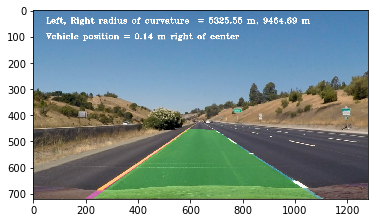

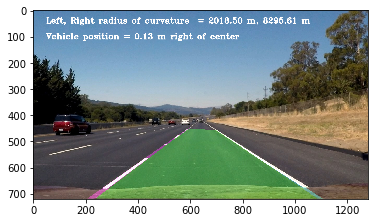

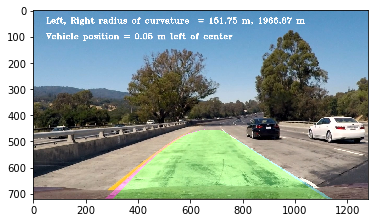

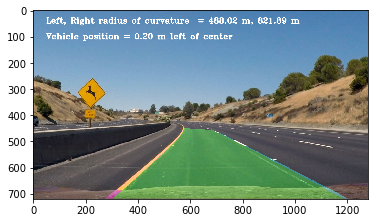

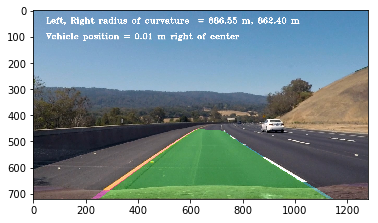

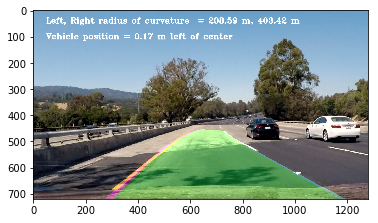

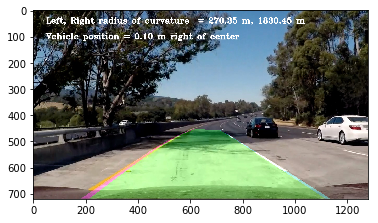

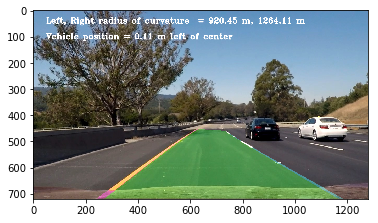

In [14]:
def Image_Overlay(img, left_fit, right_fit, Minv, tracking):
    # Create an image to draw the lines on
    color_warp = np.zeros_like(img).astype(np.uint8)
    
    # Plotting the Curves
    ploty = np.linspace(0, img.shape[0]-1, img.shape[0])
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    ploty, left_fitx, right_fitx = averaging_frames(ploty, left_fitx, right_fitx)
    
    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    if tracking: # Green when tracking is not lost Red otherwise
        cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    else:
        cv2.fillPoly(color_warp, np.int_([pts]), (255,0, 0))
    cv2.polylines(color_warp, np.int32([pts_left]), isClosed=False, color=(255,0,255), thickness=15)
    cv2.polylines(color_warp, np.int32([pts_right]), isClosed=False, color=(0,255,255), thickness=15)
    
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension

    y_eval = np.max(ploty)

    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(ploty*ym_per_pix, left_fitx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, right_fitx*xm_per_pix, 2)

    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    
    middle = (left_fitx[-1] + right_fitx[-1])//2
    veh_pos = image.shape[1]//2
    
    dx = (veh_pos - middle)*xm_per_pix # Positive if on right, Negative on left

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(img, 1, newwarp, 0.3, 0)
    
    # Adding Text
    font = cv2.FONT_HERSHEY_TRIPLEX
    cv2.putText(result,'Left, Right radius of curvature  = %.2f m, %.2f m'%(left_curverad, right_curverad),(50,50), font, 1,(255,255,255),2,cv2.LINE_AA)
    cv2.putText(result,'Vehicle position = %.2f m %s of center'%(abs(dx), 'left' if dx < 0 else 'right'),(50,110), 
                font, 1,(255,255,255),2,cv2.LINE_AA)
    
    return result

for index,img_path in enumerate(concat_test_images):
    img = mpimg.imread(img_path)
    
    processed_img = preprocess_image(img)
    result_image, _, _, _, _, Minv = transform_img(processed_img)
    left_fit, right_fit, _, _, _, _, out_img = sliding_window(result_image)
    result_image = Image_Overlay(img, left_fit, right_fit, Minv, True)
    
    # Clearing the Queues
    q_y.queue.clear()
    q_xr.queue.clear()
    q_xl.queue.clear()
    
    fig = plt.figure()
    plt.imshow(result_image)
    fig.savefig('./output_images/Final_Images_' + str(index) + '.jpg', bbox_inches='tight')

## Applying the pipeline on video.

In [15]:
left_fit = np.zeros(3)
right_fit = np.zeros(3)
left_fitx = np.zeros(img_shape0)
right_fitx = np.zeros(img_shape0)
first_frame = False
tracking = True
count = 0
# The function for processing each frame
def process_image(image):
    global left_fit, left_fitx, right_fit, right_fitx, first_frame, count, tracking
    processed_img = preprocess_image(image)
    result_image, _, _, _, _, Minv = transform_img(processed_img)
    if first_frame and sanity_check(left_fitx, right_fitx):
        left_fit, right_fit, left_fitx, right_fitx = checking_margin(result_image, left_fit, right_fit)
        count = count + 1
        tracking = True
    else:
        left_fit, right_fit, _, _, _, _, _ = sliding_window(result_image)
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
        first_frame = True
        tracking = False
    
    final_image = Image_Overlay(image, left_fit, right_fit, Minv, tracking)
    
    return final_image

## Processing on Project Video

In [16]:
# Final Processing on the project_video
warnings.simplefilter('ignore', np.RankWarning)
white_output = 'output_videos/project_video.mp4'
clip1 = VideoFileClip("test_videos/project_video.mp4")
white_clip = clip1.fl_image(process_image)
%time white_clip.write_videofile(white_output, audio=False)
print(count)


MoviePy: building video file output_videos/project_video.mp4
----------------------------------------

Writing video into output_videos/project_video.mp4


100%|██████████████████████████████████████████████████████████████████████████████| 1210/1210 [02:33<00:00,  7.50it/s]


Done writing video in output_videos/project_video.mp4 !
Your video is ready !
Wall time: 2min 34s
1090


## Processing on Challenge Video

In [17]:
# Final processing on challenge_video
white_output = 'output_videos/challenge_video.mp4'
clip1 = VideoFileClip("test_videos/challenge_video.mp4")
white_clip = clip1.fl_image(process_image)
%time white_clip.write_videofile(white_output, audio=False)


MoviePy: building video file output_videos/challenge_video.mp4
----------------------------------------

Writing video into output_videos/challenge_video.mp4


100%|████████████████████████████████████████████████████████████████████████████████| 388/388 [00:49<00:00,  8.14it/s]


Done writing video in output_videos/challenge_video.mp4 !
Your video is ready !
Wall time: 49.9 s


## Processing on Harder Challenge Video

In [18]:
# Final Processing on harder_challange_video
white_output = 'output_videos/harder_challenge_video.mp4'
clip1 = VideoFileClip("test_videos/harder_challenge_video.mp4")
white_clip = clip1.fl_image(process_image)
%time white_clip.write_videofile(white_output, audio=False)


MoviePy: building video file output_videos/harder_challenge_video.mp4
----------------------------------------

Writing video into output_videos/harder_challenge_video.mp4


100%|██████████████████████████████████████████████████████████████████████████████| 1152/1152 [02:43<00:00,  7.53it/s]


Done writing video in output_videos/harder_challenge_video.mp4 !
Your video is ready !
Wall time: 2min 44s
